In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from collections import defaultdict
import pickle
from torch.autograd import Variable
import torch.optim as optim
import sys
import data_transform
import model_funcs_GPU
import model_funcs
import model_funcs_pt2_GPU
import model_funcs_pt2
%matplotlib inline

In [27]:
train_foldername = 'en-valid-10k'
train_filename = 'qa4_train'
train_fname = 'bAbI_Data/'+str(train_foldername)+'/'+str(train_filename)

valid_foldername = 'en-valid-10k'
valid_filename = 'qa4_valid'
valid_fname = 'bAbI_Data/'+str(valid_foldername)+'/'+str(valid_filename)

test_foldername = 'en-valid-10k'
test_filename = 'qa4_test'
test_fname = 'bAbI_Data/'+str(test_foldername)+'/'+str(test_filename)

vec_fname = 'bAbI_Data/model.vec'

unk_thres = 0
pre_embed = False

train_data_BOW, valid_data_BOW, test_data_BOW, train_data_pe, valid_data_pe, test_data_pe, vocab = data_transform.get_data(
    train_fname, valid_fname, test_fname, vec_fname=vec_fname, unk_thres = unk_thres, pre_embed=pre_embed)
print(train_data_BOW.shape)
print(valid_data_BOW.shape)
print(test_data_BOW.shape)
print(len(vocab))
# print(train_data_pe[0:5])

Train Data Size :  27000
Valid Data Size :  3000
Test Data Size :  3000
(27000, 16)
(3000, 16)
(3000, 16)
15


In [31]:
if pre_embed == True:
    embed_wts = data_transform.get_embeddings(vec_fname)
else:
    embed_wts = None
if pre_embed == False:
    embedding_dim = 10
else:
    embedding_dim = embed_wts.shape[1]
vocab_size = len(vocab)
num_hops = 3
max_mem_size = 40
epochs = 150
eta = 0.0003
LS = 1
ls_thres = 0.01
temporal = True
positional = True
same = 1
GPU = False
pyTorch2 = False
dropout = 0.5
model_identity = 'model_'+str(num_hops)+'hops_'+str(LS)+'LS_'+str(dropout)+'drop_'

Using CPU...
0 Training Loss :  369.7666205707087  , Training Acc :  7.211111111111111
0 Validation Loss :  0.8361669154961904  , Validation Acc :  1.0999999999999999
1 Training Loss :  24.789810743810968  , Training Acc :  8.477777777777778
1 Validation Loss :  0.777868810971578  , Validation Acc :  15.7
2 Training Loss :  12.084710611143572  , Training Acc :  12.655555555555557
2 Validation Loss :  0.7492472428878149  , Validation Acc :  17.299999999999997
3 Training Loss :  7.0298244015404485  , Training Acc :  15.955555555555556
3 Validation Loss :  0.7307105877796809  , Validation Acc :  17.4
4 Training Loss :  4.438006879890245  , Training Acc :  16.855555555555554
4 Validation Loss :  0.7196951166788736  , Validation Acc :  16.5
5 Training Loss :  2.86768963345043  , Training Acc :  17.255555555555553
5 Validation Loss :  0.7075265639225642  , Validation Acc :  17.0
6 Training Loss :  1.93117898872642  , Training Acc :  18.011111111111113
6 Validation Loss :  0.7045924274126688 

56 Training Loss :  0.1906956890328287  , Training Acc :  74.11111111111111
56 Validation Loss :  0.19600395119073802  , Validation Acc :  72.3
57 Training Loss :  0.18524653050121076  , Training Acc :  74.8
57 Validation Loss :  0.1911671334944355  , Validation Acc :  73.0
58 Training Loss :  0.18051064752312634  , Training Acc :  75.02222222222223
58 Validation Loss :  0.18707349627038153  , Validation Acc :  73.2
59 Training Loss :  0.17636882539783363  , Training Acc :  75.64444444444445
59 Validation Loss :  0.18356043149662826  , Validation Acc :  73.5
60 Training Loss :  0.17270177335054743  , Training Acc :  75.96666666666667
60 Validation Loss :  0.18049555785224464  , Validation Acc :  74.5
61 Training Loss :  0.16941222696169927  , Training Acc :  76.24444444444445
61 Validation Loss :  0.1777789076618307  , Validation Acc :  74.6
62 Training Loss :  0.16642874650697492  , Training Acc :  76.56666666666668
62 Validation Loss :  0.17534328117390396  , Validation Acc :  74.7
6

113 Training Loss :  0.12369982739155483  , Training Acc :  79.42222222222223
113 Validation Loss :  0.1331149905755711  , Validation Acc :  77.9
114 Training Loss :  0.1234489690781091  , Training Acc :  79.42222222222223
114 Validation Loss :  0.1327136581760776  , Validation Acc :  77.7
115 Training Loss :  0.12320517175813513  , Training Acc :  79.36666666666666
115 Validation Loss :  0.1323301314017736  , Validation Acc :  77.60000000000001
116 Training Loss :  0.1229682917064287  , Training Acc :  79.38888888888889
116 Validation Loss :  0.13196285072888828  , Validation Acc :  77.8
117 Training Loss :  0.12273793594202816  , Training Acc :  79.44444444444444
117 Validation Loss :  0.13161053095243946  , Validation Acc :  77.8
118 Training Loss :  0.1225139933617366  , Training Acc :  79.47777777777777
118 Validation Loss :  0.13127289689784538  , Validation Acc :  77.8
119 Training Loss :  0.12229615808254533  , Training Acc :  79.53333333333333
119 Validation Loss :  0.13094874

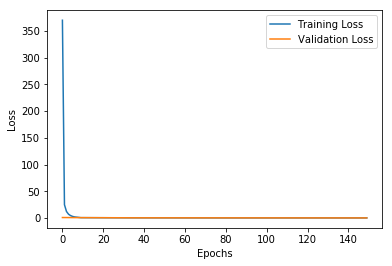

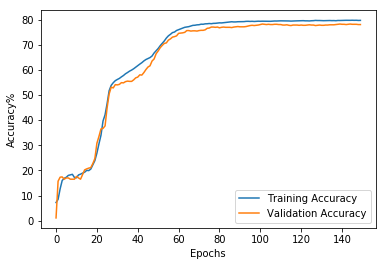

In [32]:
if pyTorch2 == False:
    if GPU == True:
        print('Using GPU...')
        model = model_funcs_GPU.QuesAnsModel(embedding_dim, vocab_size, num_hops = num_hops, max_mem_size = max_mem_size,
                                         temporal=temporal, same=same, positional=positional, dropout=dropout,
                                                                     pre_embed=pre_embed, embed_wts=embed_wts)
        l_tr, accuracy_tr, l_vd, accuracy_vd = model_funcs_GPU.train(model, train_data_BOW, valid_data_BOW,
                                                                 train_data_pe, valid_data_pe,
                                                                 epochs=epochs,eta=eta,opt=optim.Adam,LS=LS,ls_thres=ls_thres,
                                                                     model_name=model_identity)
    else:
        print('Using CPU...')
        model = model_funcs.QuesAnsModel(embedding_dim, vocab_size, num_hops = num_hops, max_mem_size = max_mem_size,
                                         temporal=temporal, same=same, positional=positional, dropout=dropout,
                                                                     pre_embed=pre_embed, embed_wts=embed_wts)
        l_tr, accuracy_tr, l_vd, accuracy_vd = model_funcs.train(model, train_data_BOW, valid_data_BOW,
                                                                 train_data_pe, valid_data_pe,
                                                                 epochs=epochs,eta=eta,opt=optim.Adam,LS=LS,ls_thres=ls_thres,
                                                                 model_name=model_identity)
else:
    if GPU == True:
        print('Using GPU...') 
        model = model_funcs_pt2_GPU.QuesAnsModel(embedding_dim, vocab_size, num_hops = num_hops, max_mem_size = max_mem_size,
                                         temporal=temporal, same=same, positional=positional, dropout=dropout,
                                                                     pre_embed=pre_embed, embed_wts=embed_wts)
        l_tr, accuracy_tr, l_vd, accuracy_vd = model_funcs_pt2_GPU.train(model, train_data_BOW, valid_data_BOW,
                                                                 train_data_pe, valid_data_pe,
                                                                 epochs=epochs,eta=eta,opt=optim.Adam,LS=LS,ls_thres=ls_thres,
                                                                         model_name=model_identity)
    else:
        print('Using CPU...')
        model = model_funcs_pt2.QuesAnsModel(embedding_dim, vocab_size, num_hops = num_hops, max_mem_size = max_mem_size,
                                         temporal=temporal, same=same, positional=positional, dropout=dropout,
                                                                     pre_embed=pre_embed, embed_wts=embed_wts)
        l_tr, accuracy_tr, l_vd, accuracy_vd = model_funcs_pt2.train(model, train_data_BOW, valid_data_BOW,
                                                                 train_data_pe, valid_data_pe,
                                                                 epochs=epochs,eta=eta,opt=optim.Adam,LS=LS,ls_thres=ls_thres,
                                                                     model_name=model_identity)

In [33]:
if pyTorch2 == False:
    if GPU == True:
        acc = model_funcs_GPU.test(model,test_data_BOW,test_data_pe)
    else:
        acc = model_funcs.test(model,test_data_BOW,test_data_pe)
else:
    if GPU == True:
        acc = model_funcs_pt2_GPU.test(model,test_data_BOW,test_data_pe)
    else:
        acc = model_funcs_pt2.test(model,test_data_BOW,test_data_pe)

76.9
